In [90]:
import pandas as pd
import numpy as np

In [91]:
df=pd.read_csv('bike_data.csv')
df.head()

,Unnamed: 0,Name,Price,Location,Running,Owner
0,0,TVS Star City Plus Dual Tone 110cc 2018,"35,000",Ahmedabad,"17,654 Km",First Owner
1,1,Royal Enfield Classic 350cc 2017,"1,19,900",Delhi,"11,000 Km",First Owner
2,2,Triumph Daytona 675R 2013,"6,00,000",Delhi,110 Km,First Owner
3,3,TVS Apache RTR 180cc 2017,"65,000",Bangalore,"16,329 Km",First Owner
4,4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,"80,000",Bangalore,"10,000 Km",First Owner


In [92]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [93]:
df.head()

,Name,Price,Location,Running,Owner
0,TVS Star City Plus Dual Tone 110cc 2018,"35,000",Ahmedabad,"17,654 Km",First Owner
1,Royal Enfield Classic 350cc 2017,"1,19,900",Delhi,"11,000 Km",First Owner
2,Triumph Daytona 675R 2013,"6,00,000",Delhi,110 Km,First Owner
3,TVS Apache RTR 180cc 2017,"65,000",Bangalore,"16,329 Km",First Owner
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,"80,000",Bangalore,"10,000 Km",First Owner


In [94]:
df.shape

(34500, 5)

In [95]:
df.describe()

,Name,Price,Location,Running,Owner
count,34500,34500,34492,34473,32974
unique,1572,1424,485,3850,4
top,Bajaj Avenger Street 220 2016,"25,000",Delhi,"20,000 Km",First Owner
freq,1896,2069,7438,1372,30262


In [96]:
df.dtypes

Name        object
Price       object
Location    object
Running     object
Owner       object
dtype: object

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      34500 non-null  object
 1   Price     34500 non-null  object
 2   Location  34492 non-null  object
 3   Running   34473 non-null  object
 4   Owner     32974 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [98]:
df.isnull().any()

Name        False
Price       False
Location     True
Running      True
Owner        True
dtype: bool

In [99]:
df.isnull().sum()

Name           0
Price          0
Location       8
Running       27
Owner       1526
dtype: int64

In [100]:
#running and location have few null values so dropping them will not make big impact
df=df[~df.Running.isnull()]
df=df[~df.Location.isnull()]

In [101]:
df.isnull().sum()

Name           0
Price          0
Location       0
Running        0
Owner       1518
dtype: int64

In [102]:
df.shape

(34465, 5)

In [103]:
def run_clean(a):
    b=str(a)
    return b.split(' ')[0].replace(',','')
df['Running']=df['Running'].apply(run_clean)
df['Price']=df['Price'].apply(lambda x: x.replace(',',''))

In [104]:
#converting price and running to numeric
df['Price']=df['Price'].apply(lambda x: x.split("\n")[0])
df['Price']=pd.to_numeric(df['Price'])
df['Running']=pd.to_numeric(df['Running'])

In [105]:
df.dtypes

Name        object
Price        int64
Location    object
Running      int64
Owner       object
dtype: object

In [106]:
#since owner is having many missing values, we cant drop all the rows with null values
#we are filling the null values with 'First Owner' since the frequency of 'First Owner' is high
df['Owner']=df['Owner'].fillna('First Owner')
df.isnull().sum()

Name        0
Price       0
Location    0
Running     0
Owner       0
dtype: int64

In [107]:
#name feature have the cc and manufactured year, we need to extract them
df['cc']=df.Name.str.extract(r'(\d\d\d)',expand=False)
df['Year']=df.Name.str.extract(r'(\d\d\d\d)',expand=False)

In [108]:
df['cc']=pd.to_numeric(df['cc'])
df['Year']=pd.to_numeric(df['Year'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34465 entries, 0 to 34499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      34465 non-null  object
 1   Price     34465 non-null  int64 
 2   Location  34465 non-null  object
 3   Running   34465 non-null  int64 
 4   Owner     34465 non-null  object
 5   cc        34465 non-null  int64 
 6   Year      34465 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [110]:
df.cc.unique()

array([110, 350, 675, 180, 150, 160, 100, 500, 250, 200, 125, 302, 201,
       220, 390, 600, 900, 650, 223, 410, 135, 765, 300, 129, 750, 400,
       130, 821, 119, 883, 959, 295, 320, 310, 899, 535, 113, 120, 105,
       800, 126, 170, 175, 797, 796, 149, 202, 109, 502, 107], dtype=int64)

In [111]:
df.Year.unique()

array([2018, 2017, 2013, 2015, 2014, 2016, 1100, 2019, 2005, 2008, 2012,
       2011, 2007, 2009, 2010, 2020, 1299, 1300, 2006, 1198, 1982, 1800,
       1130, 1000, 1200, 1050, 2004, 2003, 1991, 2002, 1262, 1998, 1700,
       1980, 1994, 1984, 1997, 2001, 2000, 1978, 1600, 1983, 1958, 1090,
       1943, 1987, 1990, 1999, 1995, 1996], dtype=int64)

In [112]:
#we are extracting the model from Name
new = df["Name"].str.split(" ", n = 4, expand = True) 
df["model"]= new[0]+' '+new[1]


In [113]:
print(len(df['model'].value_counts()))
model_dict=dict(df.model.value_counts())
model_dict

164


{'Bajaj Avenger': 4857,
 'Bajaj Pulsar': 4222,
 'Royal Enfield': 4220,
 'Hero Passion': 2867,
 'Honda CB': 1765,
 'Yamaha Fazer': 1299,
 'TVS Apache': 1083,
 'Yamaha YZF-R15': 924,
 'KTM RC': 839,
 'Yamaha FZ': 763,
 'Bajaj Platina': 739,
 'Bajaj Dominar': 729,
 'Harley-Davidson Street': 724,
 'Hero CD': 708,
 'Hero CBZ': 705,
 'Hero Hunk': 660,
 'Hero Super': 655,
 'Hyosung GT250R': 646,
 'TVS Victor': 622,
 'Suzuki Slingshot': 617,
 'Yamaha SZ-RR': 613,
 'Suzuki Zeus': 608,
 'Hero Splendor': 430,
 'Bajaj Discover': 397,
 'KTM Duke': 261,
 'Suzuki Gixxer': 176,
 'Bajaj V15': 161,
 'Honda CBR': 151,
 'Hero HF': 137,
 'Yamaha FZs': 131,
 'UM Renegade': 128,
 'Bajaj CT': 107,
 'TVS Star': 102,
 'Hero Karizma': 99,
 'Honda CBF': 79,
 'Honda Dream': 68,
 'TVS Sport': 68,
 'Hero Glamour': 56,
 'Yamaha FZ16': 53,
 'Benelli TNT': 50,
 'Kawasaki Ninja': 48,
 'Yamaha FZ25': 46,
 'Honda Livo': 45,
 'Suzuki Intruder': 42,
 'Hero Ignitor': 40,
 'Hero Xtreme': 35,
 'Yamaha SZR': 35,
 'Mahindra Cent

In [114]:
#multiple models having value count below 10 have same count so we are omitting them
#we are removing them inorder to do the count/frequency encoding
counts=df.model.value_counts()
df=df.loc[df['model'].isin(counts.index[counts>10])]

In [115]:
df=df.reset_index().drop('index',axis=1)

In [116]:
df.shape

(34114, 8)

In [117]:
#In our new dataframe some models value counts are same so we are duplicating one record from each model
#from data we can see below three models have same count as some models
#df[df.model=='TVS Sport']
#df[df.model=='Hero Xtreme']
#df[df.model=='Harley-Davidson Iron']
#df[df.model=='Yamaha FZS']
df=df.append(df.iloc[8020],ignore_index=True)
df=df.append(df.iloc[615],ignore_index=True)
df=df.append(df.iloc[184],ignore_index=True)
df=df.append(df.iloc[762],ignore_index=True)
df.shape

(34118, 8)

In [118]:
# we have reduced it to 62 models and all models have unique value count
print(len(df['model'].value_counts()))
model_dict=dict(df.model.value_counts())
model_dict

62


{'Bajaj Avenger': 4857,
 'Bajaj Pulsar': 4222,
 'Royal Enfield': 4220,
 'Hero Passion': 2867,
 'Honda CB': 1765,
 'Yamaha Fazer': 1299,
 'TVS Apache': 1083,
 'Yamaha YZF-R15': 924,
 'KTM RC': 839,
 'Yamaha FZ': 763,
 'Bajaj Platina': 739,
 'Bajaj Dominar': 729,
 'Harley-Davidson Street': 724,
 'Hero CD': 708,
 'Hero CBZ': 705,
 'Hero Hunk': 660,
 'Hero Super': 655,
 'Hyosung GT250R': 646,
 'TVS Victor': 622,
 'Suzuki Slingshot': 617,
 'Yamaha SZ-RR': 613,
 'Suzuki Zeus': 608,
 'Hero Splendor': 430,
 'Bajaj Discover': 397,
 'KTM Duke': 261,
 'Suzuki Gixxer': 176,
 'Bajaj V15': 161,
 'Honda CBR': 151,
 'Hero HF': 137,
 'Yamaha FZs': 131,
 'UM Renegade': 128,
 'Bajaj CT': 107,
 'TVS Star': 102,
 'Hero Karizma': 99,
 'Honda CBF': 79,
 'TVS Sport': 69,
 'Honda Dream': 68,
 'Hero Glamour': 56,
 'Yamaha FZ16': 53,
 'Benelli TNT': 50,
 'Kawasaki Ninja': 48,
 'Yamaha FZ25': 46,
 'Honda Livo': 45,
 'Suzuki Intruder': 42,
 'Hero Ignitor': 40,
 'Hero Xtreme': 36,
 'Yamaha SZR': 35,
 'Mahindra Cent

# Encoding the categorical values

In [119]:
#encoding our categorical values to numerical values using count/freuencey encoding
owners=pd.get_dummies(df.Owner,drop_first=True)
df=pd.concat([df,owners],axis=1)

In [120]:
df['bike_model']=df['model'].map(model_dict)

In [121]:
df

,Name,Price,Location,Running,Owner,cc,Year,model,Fourth Owner Or More,Second Owner,Third Owner,bike_model
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star,0,0,0,102
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield,0,0,0,4220
2,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache,0,0,0,1083
3,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ,0,0,0,763
4,Yamaha FZs 150cc 2015,53499,Delhi,25000,First Owner,150,2015,Yamaha FZs,0,0,0,131
...,...,...,...,...,...,...,...,...,...,...,...,...
34113,Bajaj Pulsar 150cc 2008,22000,Pune,60857,First Owner,150,2008,Bajaj Pulsar,0,0,0,4222
34114,TVS Sport Electric Start 2017,37000,Dehradun,7337,First Owner,201,2017,TVS Sport,0,0,0,69
34115,Hero Xtreme 200R 2018,72000,Mumbai,3490,First Owner,200,2018,Hero Xtreme,0,0,0,36
34116,Harley-Davidson Iron 883 2014,435000,Jaipur,5550,Second Owner,883,2014,Harley-Davidson Iron,0,1,0,30


# Generalising the location values to Corresponding state values

In [122]:
#we have many locations, so we need to reduce the no of locations
#we can convert the city/town to state name
#https://censusindia.gov.in/tables_published/Admin_Units/Admin_links/Town_Codes_2001.xls
#the above link is used to get the india census data having city/town and state data
df.Location.unique()

array(['Ahmedabad', 'Delhi', 'Bangalore', 'Mumbai', 'Bhubaneshwar',
       'Kalyan', 'Faridabad', 'Hyderabad', 'Kaithal', 'Gurgaon', 'Pune',
       'Noida', 'Nashik', 'Kochi', 'Allahabad', 'Samastipur', 'Nadiad',
       'Lucknow', 'Jaipur', 'Karnal', 'Gorakhpur', 'Hosur', 'Baripara',
       'Agra', 'Dharwad', 'Vadodara', 'Jalandhar', 'Surat', 'Chennai',
       'Navi Mumbai', 'Gandhidham', 'Visakhapatnam', 'Thrissur',
       'Kolkata', 'Ernakulam', 'Ghaziabad', 'Amritsar', 'Bagalkot',
       'Hamirpur(hp)', 'Kottayam', 'Arrah', 'Patiala', 'Ranga Reddy',
       'Mandi', 'Gwalior', 'Ludhiana', 'Mandya', 'Siliguri', 'Aurangabad',
       'Kanpur', 'Bhilwara', 'Korba', 'Meerut', 'Rewari', 'Ahmednagar',
       'Wardha', 'Chandigarh', 'Ranchi', 'Coimbatore', 'Panvel', 'Thane',
       'Jabalpur', 'Kota', 'Rohtak', 'Rajkot', 'Haridwar', 'Varanasi',
       '24 Pargana', 'Banka', 'Nagpur', 'Banki', 'Pali', 'Chhatarpur',
       'Katihar', 'Mohali', 'Rudrapur', 'Jajpur', 'Mysore', 'Adoni',
       'B

In [123]:
city=pd.read_excel('Town_Codes_2001.xls')

In [124]:
city=city.drop(['Code List of Cities/Towns (in alphabetical order): 2001','Unnamed: 2','Unnamed: 3','Unnamed: 5'],axis=1)
city=city[:5166]
city=city[5:].reset_index().drop('index',axis=1)
city.rename(columns={'Unnamed: 1':'city','Unnamed: 4':'state','Unnamed: 6':'district'},inplace=True)
city.head(10)

,city,state,district
0,1 SGM,Rajasthan,Ganganagar
1,3 STR,Rajasthan,Ganganagar
2,A.Thirumuruganpoondi,Tamil Nadu,Coimbatore
3,A.Vellalapatti,Tamil Nadu,Madurai
4,Aadityana,Gujarat,Porbandar
5,Aambaliyasan,Gujarat,Mahesana
6,Aantaliya,Gujarat,Navsari
7,Aarambhada,Gujarat,Jamnagar
8,Abhayapuri,Assam,Bongaigaon
9,Abiramam,Tamil Nadu,Ramanathapuram


In [125]:
city.tail(10)

,city,state,district
5151,Zaidpur,Uttar Pradesh,Barabanki
5152,Zalod,Gujarat,Dohad
5153,Zamania,Uttar Pradesh,Ghazipur
5154,Zamin Uthukuli,Tamil Nadu,Coimbatore
5155,Zawlnuam,Mizoram,Mamit
5156,Ziauddin Pur,Delhi *,North East
5157,Zira,Punjab,Firozpur
5158,Zirakpur,Punjab,Patiala
5159,Ziro,Arunachal Pradesh,Lower Subansiri
5160,Zunheboto,Nagaland,Zunheboto


In [126]:
#some states have '*'
city.state.unique()

array(['Rajasthan', 'Tamil Nadu', 'Gujarat', 'Assam', 'Punjab',
       'Jammu & Kashmir', 'Maharashtra', 'Uttar Pradesh',
       'Andhra Pradesh', 'Karnataka', 'Jharkhand', 'Kerala',
       'West Bengal', 'Madhya Pradesh', 'Tripura', 'Chhattisgarh',
       'Mizoram', 'Goa', 'Delhi *', 'Uttaranchal', 'Arunachal Pradesh',
       'Bihar', 'Haryana', 'Lakshadweep *', 'Dadra & Nagar Haveli *',
       'Orissa', 'Manipur', 'Himachal Pradesh', 'Meghalaya',
       'Andaman & Nicobar Islands *', 'Chandigarh *', 'Nagaland',
       'Daman & Diu *', 'Sikkim', 'Pondicherry *'], dtype=object)

In [127]:
city['state']=city.state.str.replace('*','')

In [128]:
city.state.unique()

array(['Rajasthan', 'Tamil Nadu', 'Gujarat', 'Assam', 'Punjab',
       'Jammu & Kashmir', 'Maharashtra', 'Uttar Pradesh',
       'Andhra Pradesh', 'Karnataka', 'Jharkhand', 'Kerala',
       'West Bengal', 'Madhya Pradesh', 'Tripura', 'Chhattisgarh',
       'Mizoram', 'Goa', 'Delhi ', 'Uttaranchal', 'Arunachal Pradesh',
       'Bihar', 'Haryana', 'Lakshadweep ', 'Dadra & Nagar Haveli ',
       'Orissa', 'Manipur', 'Himachal Pradesh', 'Meghalaya',
       'Andaman & Nicobar Islands ', 'Chandigarh ', 'Nagaland',
       'Daman & Diu ', 'Sikkim', 'Pondicherry '], dtype=object)

In [129]:
city_dict={}
for s,ci in city.groupby('state').city:
    c=list(ci)
    for cc in c:
        city_dict.update({cc: s})

In [130]:
district_dict={}
for s2,district in city.groupby('state').district:
    d=list(district)
    for dd in d:
        district_dict.update({dd: s2})

In [131]:
cd_dict = {**district_dict, **city_dict}

In [132]:
#we are mapping the city,district names with respective state names
df['place']=df['Location'].map(cd_dict)
#we still have 12k records having cities/district which were not covered by our census dataset
df[df.place.isnull()].shape

(12085, 13)

In [133]:
#these are cities/districts/towns which were not listed in our census dataset
df[df.place.isnull()].Location.unique()

array(['Delhi', 'Mumbai', 'Bhubaneshwar', 'Kalyan', 'Baripara',
       'Hamirpur(hp)', 'Ranga Reddy', 'Ahmednagar', 'Haridwar',
       '24 Pargana', 'Mohali', 'Jajpur', 'Godhara', 'Tiruvallur',
       'Chatrapur', 'Howrah', 'Hubli', 'Raigarh(mh)', 'Haldwani',
       'Singhbhum', 'Bardhaman', 'Hooghly', 'Mehsana', 'Sri Ganganagar',
       'Chinsurah', 'Bhatinda', 'Godavari', 'Ramanagar', 'Murad Nagar',
       'Kanchipuram', 'Kasargode', 'Amraoti', 'Chinchwad', 'Ankleshwar',
       'Raiwala', 'Alipore', 'Farukhabad', 'Hissar', 'Kanyakumari',
       'Morbi', 'Ferozepur', 'Bihar Shariff', 'Etwah', 'Calicut',
       'Sonepat', 'Chikkaballapur', 'Burdwan', 'Badaun', 'Chikamaglur',
       'Karim Nagar', 'Kotdwar', 'Goa-panaji', 'Krishnagar', 'Sholapur',
       'Cannanore (kannur)', 'Hazipur', 'Kordha', 'Mahboobnagar',
       'Yamuna Nagar', 'Dharwar', 'Jhunjhunu', 'Rajouri', 'Dharamasala',
       'Kadapa', 'Berhampore', 'Swaimadhopur', 'Gondia', 'Meenachil',
       'Silvasa'], dtype=object)

In [134]:
#since the no of cities/towns are less, collected the data manually and updated in the main dictionary
cd_dict.update({'Delhi':'Delhi', 'Mumbai':'Maharashtra', 'Bhubaneshwar':'Orissa', 'Kalyan':'Maharashtra', 'Baripara':'Uttar Pradesh',
       'Hamirpur(hp)':'Himachal Pradesh', 'Ranga Reddy':'Telangana', 'Ahmednagar':'Maharashtra', 'Haridwar':'Uttarakhand',
       '24 Pargana':'West Bengal', 'Mohali':'Punjab', 'Jajpur':'Odisha', 'Godhara':'Gujarat', 'Tiruvallur':'Tamil Nadu',
       'Chatrapur':'Odisha', 'Howrah':'West Bengal', 'Hubli':'Karnataka', 'Raigarh(mh)':'Chhattisgarh', 'Haldwani':'Uttarakhand',
       'Singhbhum':'Jharkhand', 'Bardhaman':'West Bengal', 'Hooghly':'West Bengal', 'Mehsana':'Gujarat', 'Sri Ganganagar':'Rajasthan',
       'Chinsurah':'West Bengal', 'Bhatinda':'Punjab', 'Godavari':'Andhra Pradesh', 'Ramanagar':'Karnataka', 'Murad Nagar':'Uttar Pradesh',
       'Kanchipuram':'Tamil Nadu', 'Kasargode':'Kerala', 'Amraoti':'Maharashtra', 'Chinchwad':'Maharashtra', 'Ankleshwar':'Gujarat',
       'Raiwala':'Uttarakhand', 'Alipore':'West Bengal', 'Farukhabad':'Uttar Pradesh', 'Hissar':'Haryana', 'Kanyakumari':'Tamil Nadu',
       'Morbi':'Gujarat', 'Ferozepur':'Punjab', 'Bihar Shariff':'Bihar', 'Etwah':'Uttar Pradesh', 'Calicut':'Kerala',
       'Sonepat':'Haryana', 'Chikkaballapur':'Karnataka', 'Burdwan':'West Bengal', 'Badaun':'Uttar Pradesh', 'Chikamaglur':'Karnataka',
       'Karim Nagar':'Telangana', 'Kotdwar':'Uttarakhand', 'Goa-panaji':'Goa', 'Krishnagar':'West Bengal', 'Sholapur':'Maharashtra',
       'Cannanore (kannur)':'Kerala', 'Hazipur':'Bihar', 'Kordha':'Maharashtra', 'Mahboobnagar':'Telangana',
       'Yamuna Nagar':'Haryana', 'Dharwar':'Karnataka', 'Jhunjhunu':'Rajasthan', 'Rajouri':'Jammu & Kashmir', 'Dharamasala':'Himachal Pradesh',
       'Kadapa':'Andhra Pradesh', 'Berhampore':'West Bengal', 'Swaimadhopur':'Rajasthan', 'Gondia':'Maharashtra', 'Meenachil':'Kerala',
       'Silvasa':'Gujarat'})

In [135]:
df['place']=df['Location'].map(cd_dict)
#all the null values have been filled
df[df.place.isnull()].shape

(0, 13)

In [136]:
df.head()

,Name,Price,Location,Running,Owner,cc,Year,model,Fourth Owner Or More,Second Owner,Third Owner,bike_model,place
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield,0,0,0,4220,Delhi
2,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache,0,0,0,1083,Karnataka
3,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ,0,0,0,763,Karnataka
4,Yamaha FZs 150cc 2015,53499,Delhi,25000,First Owner,150,2015,Yamaha FZs,0,0,0,131,Delhi


In [137]:
#now we have 32 categories in place 
len(df.place.unique())

32

In [138]:
df['place'].value_counts().to_dict()

{'Delhi': 7349,
 'Uttar Pradesh': 6726,
 'Maharashtra': 4602,
 'Karnataka': 2801,
 'Tamil Nadu': 2366,
 'Rajasthan': 2311,
 'Haryana': 1946,
 'Gujarat': 1787,
 'West Bengal': 863,
 'Punjab': 848,
 'Madhya Pradesh': 736,
 'Andhra Pradesh': 669,
 'Kerala': 659,
 'Bihar': 74,
 'Orissa': 68,
 'Uttaranchal': 61,
 'Chandigarh ': 47,
 'Assam': 46,
 'Jharkhand': 31,
 'Chhattisgarh': 26,
 'Himachal Pradesh': 22,
 'Jammu & Kashmir': 15,
 'Tripura': 14,
 'Telangana': 14,
 'Uttarakhand': 10,
 'Pondicherry ': 9,
 'Goa': 9,
 'Sikkim': 3,
 'Meghalaya': 2,
 'Odisha': 2,
 'Dadra & Nagar Haveli ': 1,
 'Arunachal Pradesh': 1}

In [139]:
#In our new dataframe some models value counts are same so we are duplicating one record from each model
#df[df.place=='Telangana']
#df[df.place=='Pondicherry ']
#df[df.place=='Dadra & Nagar Haveli ']
#df[df.place=='Meghalaya']
df=df.drop([227,2047,598,8863,8901])
df=df.reset_index().drop('index',axis=1)

In [140]:
df.head()

,Name,Price,Location,Running,Owner,cc,Year,model,Fourth Owner Or More,Second Owner,Third Owner,bike_model,place
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield,0,0,0,4220,Delhi
2,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache,0,0,0,1083,Karnataka
3,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ,0,0,0,763,Karnataka
4,Yamaha FZs 150cc 2015,53499,Delhi,25000,First Owner,150,2015,Yamaha FZs,0,0,0,131,Delhi


In [141]:
place_dict=df['place'].value_counts().to_dict()
df.drop(['Name','Location','Owner','model'],axis=1,inplace=True)
#count/frequency encoding for place column
df['Location']=df['place'].map(place_dict)
df.drop('place',axis=1,inplace=True)

In [142]:
df.head()

,Price,Running,cc,Year,Fourth Owner Or More,Second Owner,Third Owner,bike_model,Location
0,35000,17654,110,2018,0,0,0,102,1787
1,119900,11000,350,2017,0,0,0,4220,7349
2,65000,16329,180,2017,0,0,0,1083,2801
3,80000,10000,150,2018,0,0,0,763,2801
4,53499,25000,150,2015,0,0,0,131,7349



# Model creation

<AxesSubplot:>

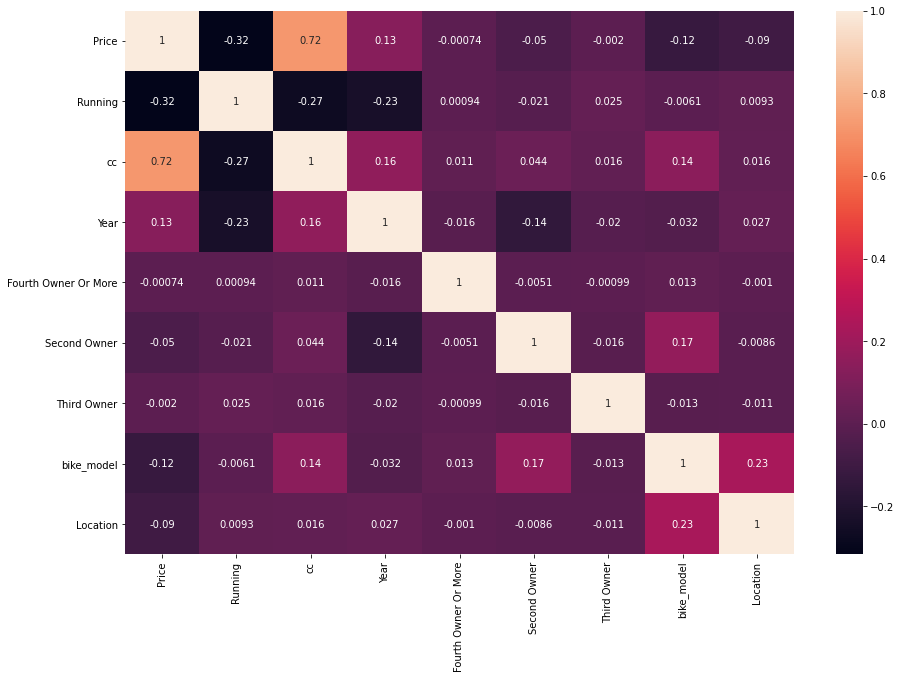

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
#cc & price have positive correlation
#running & price have negative correlation and Running & cc have negative correlation 

In [144]:
x=df.drop('Price',axis=1)
y=df.Price

In [145]:
x.head()

,Running,cc,Year,Fourth Owner Or More,Second Owner,Third Owner,bike_model,Location
0,17654,110,2018,0,0,0,102,1787
1,11000,350,2017,0,0,0,4220,7349
2,16329,180,2017,0,0,0,1083,2801
3,10000,150,2018,0,0,0,763,2801
4,25000,150,2015,0,0,0,131,7349


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [148]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()


In [149]:
regressors = {
    "xgboost": XGBRegressor(),
    "Random forest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor()
}

In [150]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [151]:
from sklearn.model_selection import cross_val_score
for key, regressors in regressors.items():
    clf=regressors.fit(x_train, y_train)
    print(clf)
    training_score = clf.score(x_test, y_test)
    print(key, "Has a training score of", round(training_score* 100,2))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xgboost Has a training score of 97.7
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction

In [168]:
#gridCV for XGBoost
from sklearn.model_selection import GridSearchCV
xgb_params={'n_estimators':[75,100,125,150,200],'learning_rate':[0.05,0.1,0.15,0.2],
             'booster':['gbtree','gblinear'],'base_score':[0.25,0.5,0.75,1] ,'min_child_weight':[1,2,3,4]}
xgb_grid=GridSearchCV(XGBRegressor(),xgb_params,cv=5,n_jobs=-1,verbose=2,return_train_score=True)
xgb_grid.fit(x_train,y_train)
xgb_bp=xgb_grid.best_params_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 15.6min finished


In [189]:
print(xgb_bp)


{'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.1, 'min_child_weight': 2, 'n_estimators': 200}


0.9413033582177164

In [72]:
xgb_bp={'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.1, 'min_child_weight': 2, 'n_estimators': 200}

In [73]:
xgb=XGBRegressor(**xgb_bp)
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.9413033582177164

In [181]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
#gridCV for Random forest
from sklearn.model_selection import GridSearchCV
rf_params={
    "n_estimators" : [90,100,115],
    'criterion': ["mse", "mae"],
    'min_samples_leaf' : [1,3,5],
    'min_samples_split': [4,6,8],
    'max_features' : ['auto','log2']
}
rf_grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=rf_params,cv=5,n_jobs=-1,verbose=2,return_train_score=True)
rf_grid.fit(x_train,y_train)
rf_bp=rf_grid.best_params_
print(rf_bp)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min


In [ ]:
rf=RandomForestRegressor(**rf_bp)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

In [66]:
#gridCV for Decision Tree
from sklearn.model_selection import GridSearchCV
dt_params={
    'criterion': ["mse", "mae"],
    'max_depth' : range(2,32,2),
    'min_samples_leaf' : range(1,10,2),
    'min_samples_split': range(2,10,2),
    'splitter' : ['best', 'random']
    
}
dt_grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=dt_params,cv=5,n_jobs=-1,verbose=2,return_train_score=True)
dt_grid.fit(x_train,y_train)
dt_bp=dt_grid.best_params_
print(dt_bp)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3457 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 4753 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 5522 tasks      | elapsed: 72.0min


{'criterion': 'mse', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 85.6min finished


In [70]:
dt_bp={'criterion': 'mse', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

In [71]:
dt=DecisionTreeRegressor(**dt_bp)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9538462996725031

In [74]:
regs = {
    "XGBoost": xgb,
    "DecisionTree": dt
}

In [75]:
# Model Evaluation
from sklearn import metrics
for model,reg in regs.items():
#for key, regressors in regressors.items():
    y_pred=reg.predict(x_test)
    acc_rf = metrics.r2_score(y_test, y_pred)
    
    print('-'*10,model,'-'*10)
    print('R^2:', acc_rf)
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

---------- XGBoost ----------
R^2: 0.9413033582177164
Adjusted R^2: 0.941257434194806
MAE: 3755.734391174257
MSE: 368209316.4865705
RMSE: 19188.7810057484
---------- DecisionTree ----------
R^2: 0.9538462996725031
Adjusted R^2: 0.9538101891979193
MAE: 3013.575052662824
MSE: 289526315.8997793
RMSE: 17015.472837972484


In [191]:
import pickle
#Creating a file
file=open('used_bike.pkl','wb')

#Dump model to the file
pickle.dump(xgb,file)

In [83]:
df.columns

Index(['Price', 'Running', 'cc', 'Year', 'Fourth Owner Or More',
       'Second Owner', 'Third Owner', 'bike_model', 'Location'],
      dtype='object')

In [82]:
x.columns

Index(['Running', 'cc', 'Year', 'Fourth Owner Or More', 'Second Owner',
       'Third Owner', 'bike_model', 'Location'],
      dtype='object')

In [76]:
import pickle

In [78]:
final_model=pickle.load(open('used_bike.pkl','rb'))

In [153]:
#NOTE: The XGBoost Regressor does not take input in the form of list.
#So we need to convert the input data either into DMatrix or pandas dataframe.
#input_variables = pd.DataFrame([[15000,150,2015,0,0,1,176,7345]],
input_variables = pd.DataFrame([[11000,500,2011,0,0,0,4222,7349]],
        columns=['Running','cc','Year','Fourth Owner Or More','Second Owner','Third Owner','bike_model','Location'],
        dtype=float)
my_prediction=final_model.predict(input_variables)
my_prediction

array([89181.9], dtype=float32)

In [85]:
final_model.score(x_test,y_test)

0.9413033582177164

In [86]:
temp

,Name,Price,Location,Running,Owner,cc,Year,model,Fourth Owner Or More,Second Owner,Third Owner,bike_model
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star,0,0,0,102
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield,0,0,0,4220
2,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache,0,0,0,1083
3,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ,0,0,0,763
4,Yamaha FZs 150cc 2015,53499,Delhi,25000,First Owner,150,2015,Yamaha FZs,0,0,0,131
...,...,...,...,...,...,...,...,...,...,...,...,...
34113,Bajaj Pulsar 150cc 2008,22000,Pune,60857,First Owner,150,2008,Bajaj Pulsar,0,0,0,4222
34114,TVS Sport Electric Start 2017,37000,Dehradun,7337,First Owner,201,2017,TVS Sport,0,0,0,69
34115,Hero Xtreme 200R 2018,72000,Mumbai,3490,First Owner,200,2018,Hero Xtreme,0,0,0,36
34116,Harley-Davidson Iron 883 2014,435000,Jaipur,5550,Second Owner,883,2014,Harley-Davidson Iron,0,1,0,30


In [87]:
model_dict

{'Bajaj Avenger': 4857,
 'Bajaj Pulsar': 4222,
 'Royal Enfield': 4220,
 'Hero Passion': 2867,
 'Honda CB': 1765,
 'Yamaha Fazer': 1299,
 'TVS Apache': 1083,
 'Yamaha YZF-R15': 924,
 'KTM RC': 839,
 'Yamaha FZ': 763,
 'Bajaj Platina': 739,
 'Bajaj Dominar': 729,
 'Harley-Davidson Street': 724,
 'Hero CD': 708,
 'Hero CBZ': 705,
 'Hero Hunk': 660,
 'Hero Super': 655,
 'Hyosung GT250R': 646,
 'TVS Victor': 622,
 'Suzuki Slingshot': 617,
 'Yamaha SZ-RR': 613,
 'Suzuki Zeus': 608,
 'Hero Splendor': 430,
 'Bajaj Discover': 397,
 'KTM Duke': 261,
 'Suzuki Gixxer': 176,
 'Bajaj V15': 161,
 'Honda CBR': 151,
 'Hero HF': 137,
 'Yamaha FZs': 131,
 'UM Renegade': 128,
 'Bajaj CT': 107,
 'TVS Star': 102,
 'Hero Karizma': 99,
 'Honda CBF': 79,
 'TVS Sport': 69,
 'Honda Dream': 68,
 'Hero Glamour': 56,
 'Yamaha FZ16': 53,
 'Benelli TNT': 50,
 'Kawasaki Ninja': 48,
 'Yamaha FZ25': 46,
 'Honda Livo': 45,
 'Suzuki Intruder': 42,
 'Hero Ignitor': 40,
 'Hero Xtreme': 36,
 'Yamaha SZR': 35,
 'Mahindra Cent

In [88]:
place_dict

{'Delhi': 7349,
 'Uttar Pradesh': 6726,
 'Maharashtra': 4602,
 'Karnataka': 2801,
 'Tamil Nadu': 2366,
 'Rajasthan': 2311,
 'Haryana': 1946,
 'Gujarat': 1787,
 'West Bengal': 863,
 'Punjab': 848,
 'Madhya Pradesh': 736,
 'Andhra Pradesh': 669,
 'Kerala': 659,
 'Bihar': 74,
 'Orissa': 68,
 'Uttaranchal': 61,
 'Chandigarh ': 47,
 'Assam': 46,
 'Jharkhand': 31,
 'Chhattisgarh': 26,
 'Himachal Pradesh': 22,
 'Jammu & Kashmir': 15,
 'Tripura': 14,
 'Telangana': 13,
 'Uttarakhand': 10,
 'Goa': 9,
 'Pondicherry ': 8,
 'Sikkim': 3,
 'Odisha': 2,
 'Arunachal Pradesh': 1}